                         
# **Participantes do grupo**
                          

---



*   # Victor Candile Monteiro Barbosa - 98846
*   # Gustavo Candile Monteiro Barbosa - 98852
*   # Vitor Blankenburg Soares Tavares  - 99079
*   # OTAVIO LIRA NEVES - 552476



FIAP - Tecnólogo de Inteligência Artificial

# Checkpoint 05

Faça o exercício abaixo <font color="red">em grupos de até 4 pessoas</font>, para praticar o uso do `sklearn avançado` em Machine Learning. Utilize os conceitos vistos em aula, e consulte [documentações](https://scikit-learn.org/stable/) na internet. Em caso de dúvidas, contate o Prof. Michel.

**Entrega**: 25/setembro/2023, via Teams.

**Apresentação**: utilizaremos a aula de 25/setembro para apresentação dos trabalhos e rodada de feedbacks!


## Apresentação do trabalho

Neste checkpoint vamos trabalhar com modelagem de dados utilizando os recursos avançados do `sklearn`.

Isso implica o uso de:  

- Tratamento de missing
- Identificação e tratamento de outliers
- Feature engineering (redução de dimensionalidade, padronização, encoder, etc)
- Lidar com desbalanceamento de dados
- Seleção de modelos pertinentes ao problema elencado (regressão x classificação)
- Otimização de hiperparâmetros
- Validação cruzada
- Escolha de métricas pertinentes
- Pipelines
- Interpretabilidade dos resultados

**Dataset**: vocês estão livres para escolher um dataset de interesse do grupo. Com o que gostariam de trabalhar? Saúde? Varejo? Jogos? Agronegócio? Finanças? Escolham uma base pública do Kaggle e sejam felizes. =)

**Critérios de avaliação**: A correção do checkpoint será feita mediante os seguintes critérios:
- completude do pipeline
- emprego correto dos conceitos de machine learning vistos em sala de aula
- apresentação do dia 25/setembro (análise/justificativas dos resultados)


### Sobre o DataSet Existem 13 atributos:
* 1. Idade: Idade (em anos)
* 2. Sexo: gênero (1 = masculino; 0 = feminino)
* 3. ChestPain: Tipo de dor no peito - 1: angina típica (todos os critérios presentes) - 2: angina atípica (dois de três critérios satisfeitos) -- 3: dor não anginosa (menos de um critério satisfeito) -- 4: assintomático (nenhum dos critérios é satisfeito)
* 4. Restbps: Pressão arterial em repouso (em mmHg, na admissão no hospital)
* 5. Col: colesterol sérico em mg/dL
* 6. Fbs: glicemia em jejum > 120 mg/dL (provável ser diabético) 1 = verdadeiro; 0 = falso
* 7. RestECG: resultados do eletrocardiograma de repouso -- Valor 0: normal -- Valor 1: apresentar anormalidade nas ondas ST-T (inversões das ondas T e/ou elevação ou depressão de ST > 0,05 mV) -- Valor 2: mostrando provável ou hipertrofia ventricular esquerda definitiva pelos critérios de Estes
* 8. FCMáx: Maior número de batimentos por minuto que seu coração pode atingir durante exercícios extenuantes.
* 9.Exang: angina induzida por exercício (1 = sim; 0 = não)
* 10. Oldpeak: depressão do segmento ST induzida pelo exercício em relação ao repouso (em mm, obtida pela subtração dos pontos mais baixos do segmento ST durante o exercício e repouso)
* 11. Inclinação: o inclinação do pico do segmento ST do exercício, as anormalidades ST-T são consideradas um indicador crucial para identificar a presença de isquemia - Valor 1: ascendente - Valor 2: plano - Valor 3: descendente
* 12.Ca: número de vasos principais (0-3) colorido por fluoroscopia. Os principais vasos cardíacos são: aorta, veia cava superior, veia cava inferior, artéria pulmonar (sangue pobre em oxigênio -> pulmões), veias pulmonares (sangue rico em oxigênio -> coração) e artérias coronárias (fornecem sangue para tecido cardíaco).
* 13. DAH: 0 = normal; 1 = defeito fixo (o tecido cardíaco não consegue absorver o tálio tanto sob estresse quanto em repouso); 2 = defeito reversível (o tecido cardíaco é incapaz de absorver tálio apenas durante a parte de exercício do teste)
* 14.AHD: 0 = sem doença, 1 = doença

#Código

Bibliotecas

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.decomposition import PCA
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score
import numpy as np
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV, StratifiedKFold, train_test_split
import numpy as np

Tratamento de Missing Data:

In [ ]:
# Carregue seu dataset
df = pd.read_csv('Heart Attack Data Set.csv')

# Identifique as colunas com valores ausentes
colunas_com_ausentes = df.columns[df.isnull().any()]

# Preencha os valores ausentes com a média das colunas
df[colunas_com_ausentes] = df[colunas_com_ausentes].fillna(df[colunas_com_ausentes].mean())

# Ou remova as linhas com valores ausentes
df = df.dropna()

df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


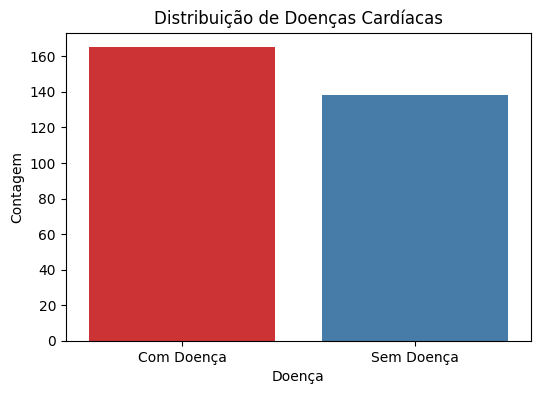

In [ ]:
# Mapeie os valores 0 e 1 para rótulos mais descritivos
df['target'] = df['target'].map({0: 'Sem Doença', 1: 'Com Doença'})

# Crie um gráfico de barras para visualizar a distribuição das doenças
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='target', palette='Set1')  # Usei 'palette' para escolher cores diferentes para as barras
plt.title('Distribuição de Doenças Cardíacas')
plt.xlabel('Doença')
plt.ylabel('Contagem')
plt.show()

Identificação e Tratamento de Outliers:

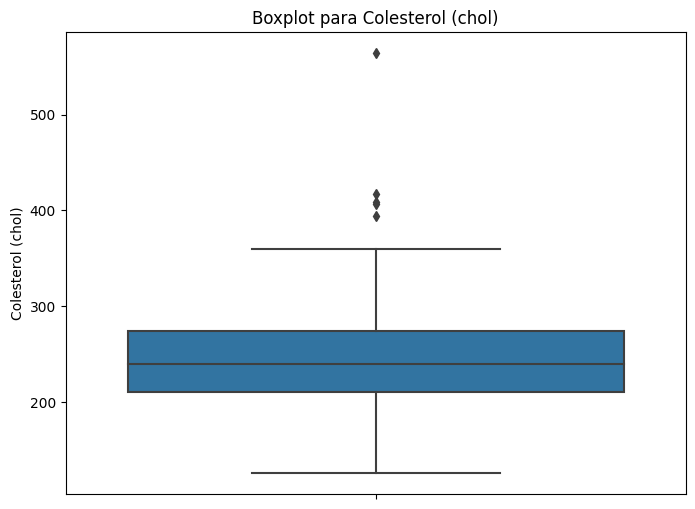

In [ ]:
# Identificar outliers para a variável 'age' usando um boxplot
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, y='chol')
plt.title('Boxplot para Colesterol (chol)')
plt.ylabel('Colesterol (chol)')
plt.show()

In [ ]:
# Definir o limite superior
Q3_age = df['chol'].quantile(0.75)
IQR_age = Q3_age - df['chol'].quantile(0.25)
limite_superior_age = Q3_age + 1.5 * IQR_age

# Remover outliers da variável 'age' com um limite superior
df = df[df['chol'] <= limite_superior_age]
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,Com Doença
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,Com Doença
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,Com Doença
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,Com Doença
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,Com Doença
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,Sem Doença
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,Sem Doença
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,Sem Doença
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,Sem Doença


Feature Engineering:

In [ ]:
# Suponha que 'X' seja seu conjunto de características e 'y' seja seu alvo
X = df[['age', 'trestbps', 'chol', 'thalach', 'oldpeak', 'sex', 'cp']]
y = df['target']  # Suponha que 'target' seja o rótulo que você está tentando prever

# Divida seus dados em conjuntos de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Defina suas listas de features numéricas e categóricas
numeric_features = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
categorical_features = ['sex', 'cp']

# Crie transformadores para as features numéricas e categóricas
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())])

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder())])

# Crie um ColumnTransformer para aplicar os transformadores às features correspondentes
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

# Aplique o pré-processamento aos conjuntos de treinamento e teste
X_train_preprocessed = preprocessor.fit_transform(X_train)
X_test_preprocessed = preprocessor.transform(X_test)

# Aplique a redução de dimensionalidade (PCA) aos conjuntos de treinamento e teste
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_preprocessed)
X_test_pca = pca.transform(X_test_preprocessed)

Lidar com Desbalanceamento de Dados:

In [ ]:
# Aplicação do SMOTE para balanceamento
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train_pca, y_train)

#Modelos

### Modelo de Regressão Logística

In [ ]:
# Modelo de Regressão Logística
modelo_lr = LogisticRegression(random_state=42)

In [ ]:
param_grid_lr = {
    'C': [0.01, 0.1, 1, 10, 100],
    'penalty': ['l2']
}

grid_search_lr = GridSearchCV(modelo_lr, param_grid_lr, cv=StratifiedKFold(n_splits=5), scoring='accuracy')
grid_search_lr.fit(X_resampled, y_resampled)

melhores_parametros_lr = grid_search_lr.best_params_
melhores_parametros_lr

{'C': 0.01, 'penalty': 'l2'}

In [ ]:
melhor_modelo_lr = LogisticRegression(C=melhores_parametros_lr['C'], penalty='l2', random_state=42)
melhor_modelo_lr.fit(X_resampled, y_resampled)

y_pred_lr = melhor_modelo_lr.predict(X_test_pca)

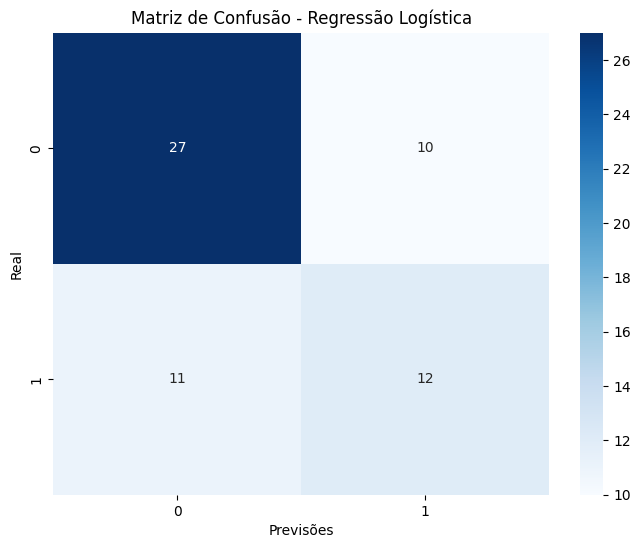

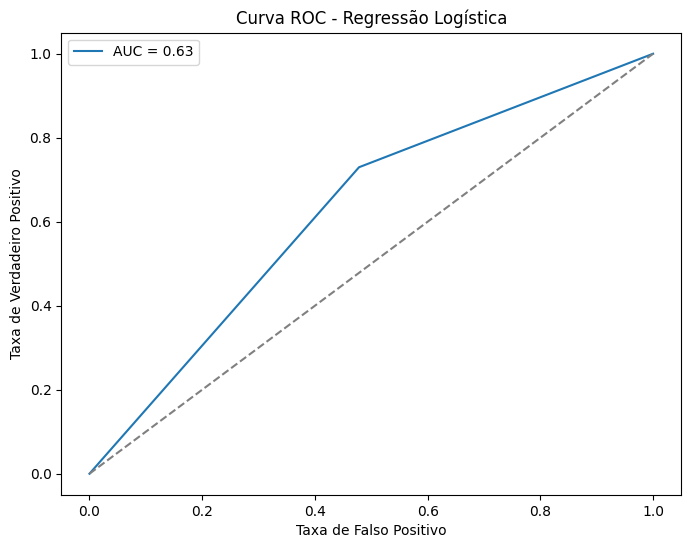

In [ ]:
# Calcule a matriz de confusão para o modelo de Regressão Logística
cm_lr = confusion_matrix(y_test, y_pred_lr)

# Mapeie os rótulos de classe para valores numéricos
y_test_numeric_lr = y_test.map({'Sem Doença': 0, 'Com Doença': 1})
y_pred_numeric_lr = np.where(y_pred_lr == 'Com Doença', 1, 0)

# Calcule a pontuação ROC AUC para o modelo de Regressão Logística
roc_auc_lr = roc_auc_score(y_test_numeric_lr, y_pred_numeric_lr)

# Crie a curva ROC para o modelo de Regressão Logística
fpr_lr, tpr_lr, thresholds_lr = roc_curve(y_test_numeric_lr, y_pred_numeric_lr)

# Crie o gráfico da matriz de confusão para o modelo de Regressão Logística
plt.figure(figsize=(8, 6))
sns.heatmap(cm_lr, annot=True, fmt='d', cmap='Blues')
plt.title('Matriz de Confusão - Regressão Logística')
plt.xlabel('Previsões')
plt.ylabel('Real')
plt.show()

# Crie a curva ROC para o modelo de Regressão Logística
plt.figure(figsize=(8, 6))
plt.plot(fpr_lr, tpr_lr, label=f'AUC = {roc_auc_lr:.2f}')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('Taxa de Falso Positivo')
plt.ylabel('Taxa de Verdadeiro Positivo')
plt.title('Curva ROC - Regressão Logística')
plt.legend()
plt.show()

### Modelo Random Forest

In [ ]:
# Modelo Random Forest
modelo_rf = RandomForestClassifier(random_state=42)

Otimização de Hiperparâmetros:

In [ ]:
# Definindo uma grade de hiperparâmetros para pesquisa em grade
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(modelo_rf, param_grid, cv=StratifiedKFold(n_splits=5), scoring='accuracy')
grid_search.fit(X_resampled, y_resampled)

melhores_parametros_rf = grid_search.best_params_
melhores_parametros_rf

{'max_depth': 10,
 'min_samples_leaf': 4,
 'min_samples_split': 10,
 'n_estimators': 200}

In [ ]:
# Crie um novo modelo RandomForestClassifier com os melhores parâmetros
melhor_modelo_rf = RandomForestClassifier(
    n_estimators=melhores_parametros_rf['n_estimators'],
    max_depth=melhores_parametros_rf['max_depth'],
    min_samples_split=melhores_parametros_rf['min_samples_split'],
    min_samples_leaf=melhores_parametros_rf['min_samples_leaf'],
    random_state=42
)

# Treine o modelo com os dados de treinamento
melhor_modelo_rf.fit(X_resampled, y_resampled)

y_pred = melhor_modelo_rf.predict(X_test_pca)

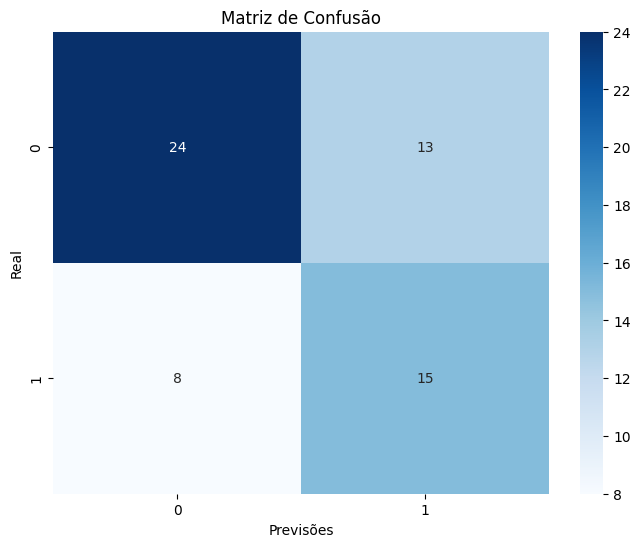

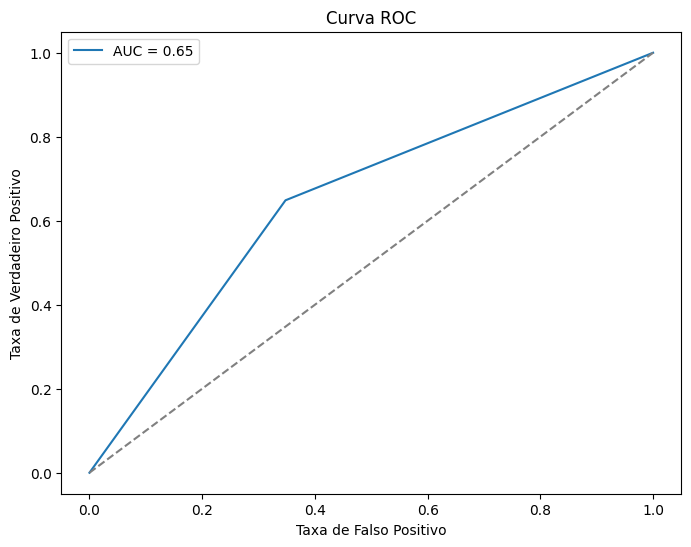

In [ ]:
# Calcule a matriz de confusão
cm = confusion_matrix(y_test, y_pred)

# Mapeie os rótulos de classe para valores numéricos
y_test_numeric = y_test.map({'Sem Doença': 0, 'Com Doença': 1})
y_pred_numeric = np.where(y_pred == 'Com Doença', 1, 0)

# Calcule a pontuação ROC AUC
roc_auc = roc_auc_score(y_test_numeric, y_pred_numeric)

# Crie a curva ROC
fpr, tpr, thresholds = roc_curve(y_test_numeric, y_pred_numeric)

# Crie o gráfico da matriz de confusão
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Matriz de Confusão')
plt.xlabel('Previsões')
plt.ylabel('Real')
plt.show()

# Crie a curva ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('Taxa de Falso Positivo')
plt.ylabel('Taxa de Verdadeiro Positivo')
plt.title('Curva ROC')
plt.legend()
plt.show()

# Escolha de Métricas Pertinentes:

In [ ]:
acuracia_rf = accuracy_score(y_test, y_pred)
precisao_rf = precision_score(y_test, y_pred, average='weighted')
recall_rf = recall_score(y_test, y_pred, average='weighted')
f1_rf = f1_score(y_test, y_pred, average='weighted')
print("\nMétricas para o modelo Random Forest:")
print(f'Acurácia: {acuracia_rf * 100:.2f}%')
print(f'Precisão: {precisao_rf * 100:.2f}%')
print(f'Recall: {recall_rf * 100:.2f}%')
print(f'F1-score: {f1_rf * 100:.2f}%')


Métricas para o modelo Random Forest:
Acurácia: 65.00%
Precisão: 66.79%
Recall: 65.00%
F1-score: 65.45%


In [ ]:
# Métricas de Avaliação para o modelo de Regressão Logística
acuracia_lr = accuracy_score(y_test, y_pred_lr)
precisao_lr = precision_score(y_test, y_pred_lr, average='weighted')
recall_lr = recall_score(y_test, y_pred_lr, average='weighted')
f1_lr = f1_score(y_test, y_pred_lr, average='weighted')

print("Métricas para o modelo de Regressão Logística:")
print(f'Acurácia: {acuracia_lr * 100:.2f}%')
print(f'Precisão: {precisao_lr * 100:.2f}%')
print(f'Recall: {recall_lr * 100:.2f}%')
print(f'F1-score: {f1_lr * 100:.2f}%')

Métricas para o modelo de Regressão Logística:
Acurácia: 65.00%
Precisão: 64.72%
Recall: 65.00%
F1-score: 64.84%


#Validação Cruzada:

In [ ]:
# Realize a validação cruzada para avaliar o desempenho do modelo
scores = cross_val_score(modelo_rf, X_resampled, y_resampled, cv=5, scoring='accuracy')
scores

array([0.64, 0.6 , 0.52, 0.7 , 0.68])

In [ ]:
# Realize a validação cruzada para avaliar o desempenho do modelo
scores = cross_val_score(modelo_lr, X_resampled, y_resampled, cv=5, scoring='accuracy')
scores

array([0.84, 0.78, 0.62, 0.78, 0.72])